# TODO: 
- Find the right model for the random data.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from jormund import *
setup_plots()

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Original:

In [2]:
# Generate synthetic residuals data for a stock price
np.random.seed(0)
errors = np.random.normal(0, 1, 1000)
stock_residuals = pd.Series(errors).cumsum()  # cumulative sum to simulate residuals

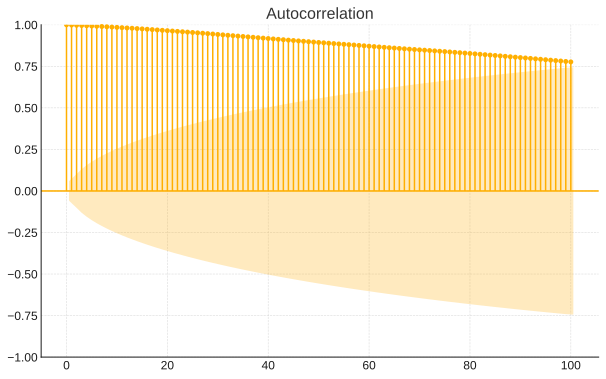

In [5]:
plot_acf(stock_residuals, lags=100, alpha=0.063)
plt.show()

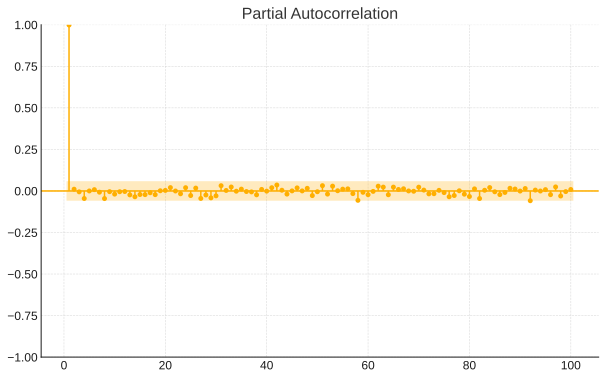

In [22]:
plot_pacf(stock_residuals, lags=100, alpha=0.063)
plt.show()

In [9]:
# Perform ADF test on stationary data
adf_result = adfuller(stock_residuals)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) # Should be extremely small (commonly smaller than 0.05) for stationarity.

ADF Statistic: -0.5437433594783736
p-value: 0.8831939389121154


In [19]:
# Fit AR(2) model (order 2 for AR, 0 for MA)
model_ma = ARIMA(stock_residuals, order=(2, 0, 0))
ma_fit = model_ma.fit()

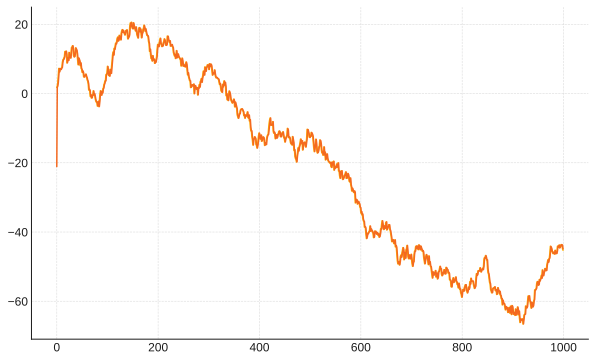

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1408.570
Date:                Mon, 11 Nov 2024   AIC                           2825.139
Time:                        12:00:02   BIC                           2844.770
Sample:                             0   HQIC                          2832.600
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0976     28.145     -0.750      0.453     -76.262      34.066
ar.L1          0.9751      0.032     30.785      0.000       0.913       1.037
ar.L2          0.0243      0.032      0.767      0.4

In [15]:
# Plot original data and forecast
plt.plot(stock_residuals, label="Original Data")
plt.plot(ma_fit.fittedvalues, label="AR(1) Fitted Values")
plt.show()

# Display summary
print(ma_fit.summary())

# Differencing:

In [24]:
stock_residuals_diff = stock_residuals.diff().dropna() # First value is a nan

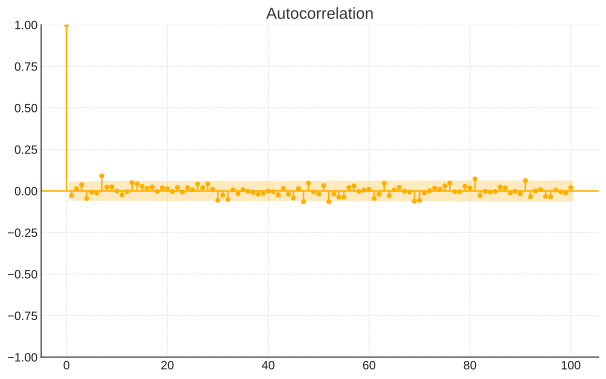

In [25]:
plot_acf(stock_residuals_diff, lags=100, alpha=0.063)
plt.show()

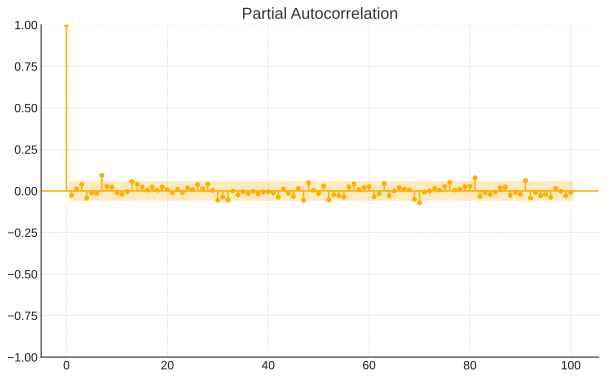

In [26]:
plot_pacf(stock_residuals_diff, lags=100, alpha=0.063)
plt.show()

In [43]:
# Perform ADF test on stationary data
adf_result = adfuller(stock_residuals_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) # Should be extremely small (commonly smaller than 0.05) for stationarity.

ADF Statistic: -32.424887206916196
p-value: 0.0


In [17]:
# Fit MA(2) model (order 7 for AR, 1 for I, 0 for MA)
model_ma = ARIMA(stock_residuals_diff, order=(7, 1, 0))
ma_fit = model_ma.fit()

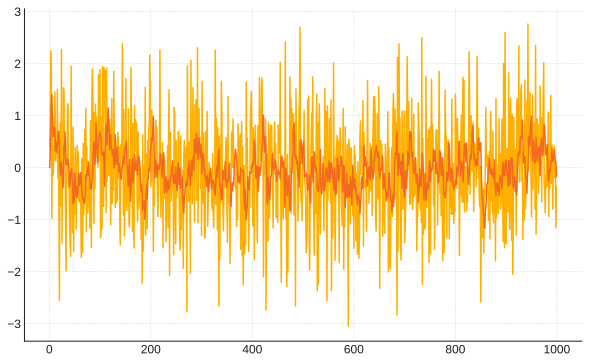

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -1444.583
Date:                Mon, 11 Nov 2024   AIC                           2905.166
Time:                        12:01:22   BIC                           2944.412
Sample:                             0   HQIC                          2920.084
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9209      0.031    -29.427      0.000      -0.982      -0.860
ar.L2         -0.7856      0.043    -18.294      0.000      -0.870      -0.701
ar.L3         -0.6249      0.048    -13.049      0.0

In [18]:
# Plot original data and forecast
plt.plot(stock_residuals_diff, label="Original Data")
plt.plot(ma_fit.fittedvalues, label="ARIMA(7, 1, 0) Fitted Values")
plt.show()

# Display summary
print(ma_fit.summary())